#### Hand Made Multi Layer Perceptron
In this notebook we use a hand made multi layer perceptron to predict the class of a given number in MNIST dataset.
We use only numpy and implement from scratch the MLP and the forward and backward propagation.
The code of the MLP is in the file mlp.py.


In [1]:
import importlib
import mlp
importlib.reload(mlp)
from mlp import NeuralNetMLP, prepare_dataset
from sklearn.datasets import fetch_openml
import numpy as np


In [3]:
# Fetch mnist dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(X, y.astype(np.int32))

#### Instantiate the hand made neural network
This is a simple neural network with only one hidden layer and a 10 units output layer, using sigmoid activation function for both layers.
We use 784 input units and 10 output units. The hidden layer has also 784 units.

In [73]:
mlp = NeuralNetMLP(n_hidden=784, number_classes=10, number_features=784, lr=0.1)

#### Get base accuracy and loss
This is the base accuracy and loss of the neural network before training.

In [79]:
val_loss, val_acc = mlp.score(X_val, y_val)
print("Validation loss: %.2f" % val_loss)
print("Validation accuracy: %.2f%%" % (val_acc*100))

Validation loss: 0.29
Validation accuracy: 9.68%


#### Train the neural network
This is the training of the neural network. We measure the time it takes to train the neural network. This hand made neural network is trained for 100 epochs, note that it is highly inefficient because we are using cpus to train the neural network.

In [80]:
# Measure the time it takes to train the neural network
import time
start = time.time()
train_losses, train_accs, val_losses, val_accs = mlp.fit(X_train, y_train, X_val, y_val, epochs=40, batch_size=128)
end = time.time()
print("Training time: %.2f Segs" % (end - start))


Performing epoch number:  0
Epoch: 001/040 | Train MSE: 0.03 | Train Acc: 0.87% | Val MSE: 0.03 | Valid Acc: 0.87%
Performing epoch number:  1
Epoch: 002/040 | Train MSE: 0.02 | Train Acc: 0.89% | Val MSE: 0.02 | Valid Acc: 0.90%
Performing epoch number:  2
Epoch: 003/040 | Train MSE: 0.02 | Train Acc: 0.90% | Val MSE: 0.02 | Valid Acc: 0.90%
Performing epoch number:  3
Epoch: 004/040 | Train MSE: 0.02 | Train Acc: 0.91% | Val MSE: 0.02 | Valid Acc: 0.91%
Performing epoch number:  4
Epoch: 005/040 | Train MSE: 0.02 | Train Acc: 0.92% | Val MSE: 0.02 | Valid Acc: 0.92%
Performing epoch number:  5
Epoch: 006/040 | Train MSE: 0.02 | Train Acc: 0.92% | Val MSE: 0.02 | Valid Acc: 0.92%
Performing epoch number:  6
Epoch: 007/040 | Train MSE: 0.01 | Train Acc: 0.92% | Val MSE: 0.01 | Valid Acc: 0.92%
Performing epoch number:  7
Epoch: 008/040 | Train MSE: 0.01 | Train Acc: 0.93% | Val MSE: 0.01 | Valid Acc: 0.93%
Performing epoch number:  8
Epoch: 009/040 | Train MSE: 0.01 | Train Acc: 0.93% 

In [81]:
# Get score on the different sets
train_loss, train_acc = mlp.score(X_train, y_train)
val_loss, val_acc = mlp.score(X_val, y_val)
test_loss, test_acc = mlp.score(X_test, y_test)

#Pretty print the results on a table
print("Train loss: %.2f" % train_loss)
print("Train accuracy: %.2f%%" % (train_acc*100))
print("Validation loss: %.2f" % val_loss)
print("Validation accuracy: %.2f%%" % (val_acc*100))
print("Test loss: %.2f" % test_loss)
print("Test accuracy: %.2f%%" % (test_acc*100))

Train loss: 0.01
Train accuracy: 96.78%
Validation loss: 0.01
Validation accuracy: 96.56%
Test loss: 0.01
Test accuracy: 95.93%


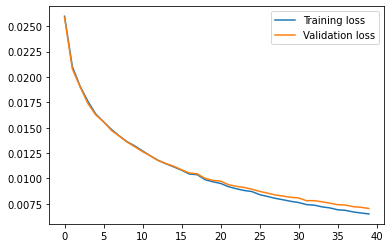

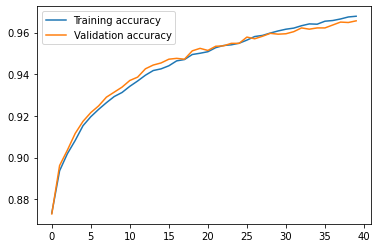

In [87]:
# Plot the loss and accuracy on the training and validation sets
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()
plt.plot(train_accs, label='Training accuracy')
plt.plot(val_accs, label='Validation accuracy')
plt.legend()
plt.show()